Создайте треугольный сигнал и вычислите его спектр с применением преобразования Фурье. 
Вы можете использовать готовые библиотеки, но можете и реализовать преобразование самостоятельно.
Проведите обратное преобразование (из частотной области во временную). Проанализируйте исходный сигнал и полученный результат. 
Попробуйте преобразовать исходный сигнал и полученный результат в формат аудиозаписи, например, wave, и прослушать. Опишите результат.

Повторите то же самое для прямоугольного сигнала. 

Text(0, 0.5, 'Амплитуда')

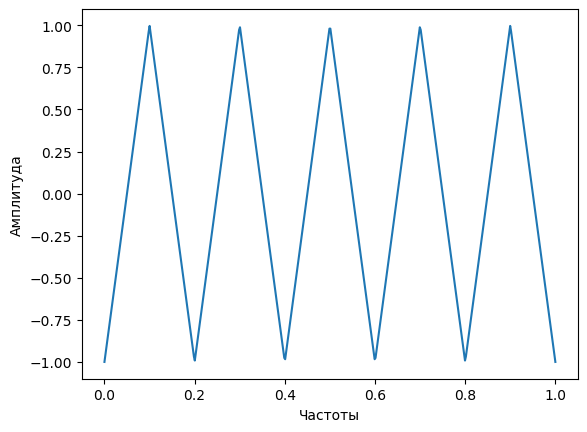

In [10]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(0, 1, 500)
triangle = signal.sawtooth(2 * np.pi * 5 * t, 0.5)
plt.plot(t, triangle)
plt.xlabel('Частоты')
plt.ylabel('Амплитуда')

(0.0, 100.0)

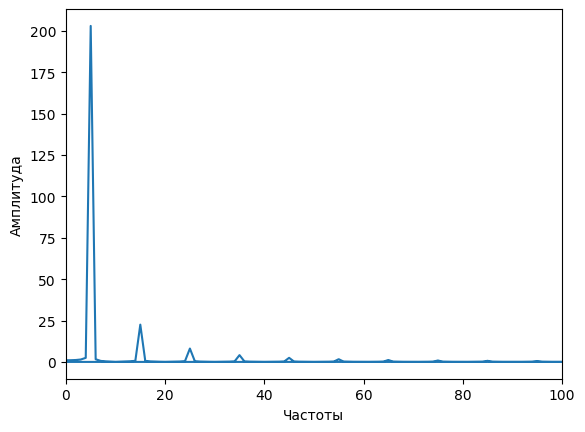

In [11]:
fft_result = fft(triangle)
amplitude_spectrum = np.abs(fft_result)
frequencies = fftfreq(500, 1/500)
plt.plot(frequencies, amplitude_spectrum)
plt.xlabel('Частоты')
plt.ylabel('Амплитуда')
plt.xlim(0,100)

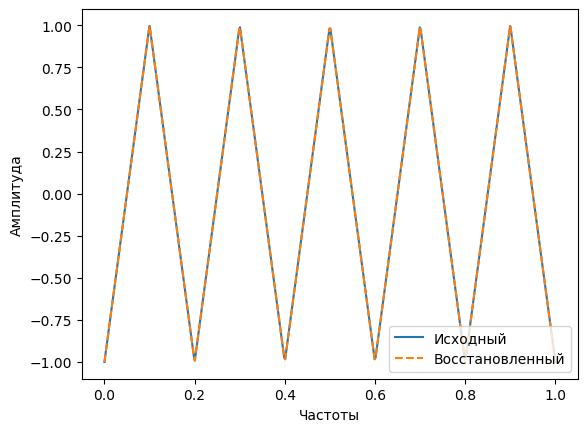

In [12]:
reconstructed = ifft(fft_result).real
plt.plot(t, reconstructed, label='Исходный')
plt.plot(t, triangle, label='Восстановленный', linestyle='--')
plt.xlabel('Частоты')
plt.ylabel('Амплитуда')
plt.legend(loc="lower right")

(0.0, 100.0)

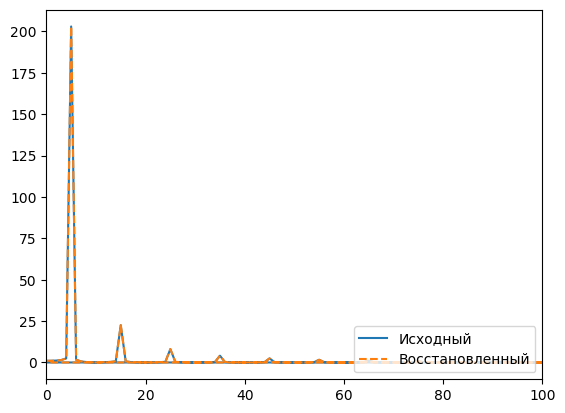

In [13]:
fft_result_reconstructed_triangle = fft(reconstructed)
amplitude_spectrum_reconstructed_triangle = np.abs(fft_result_reconstructed_triangle)
plt.plot(frequencies, amplitude_spectrum, label='Исходный')
plt.plot(frequencies,amplitude_spectrum_reconstructed_triangle, label='Восстановленный', linestyle='--')
plt.legend(loc="lower right")
plt.xlim(0,100)

In [14]:
from scipy.io.wavfile import write
sampling_rate = 500
write('triangle_signal.wav', sampling_rate, (triangle * 32767).astype(np.int16))

Повторим эти действия для прямоугольного сигнала

Text(0, 0.5, 'Амплитуда')

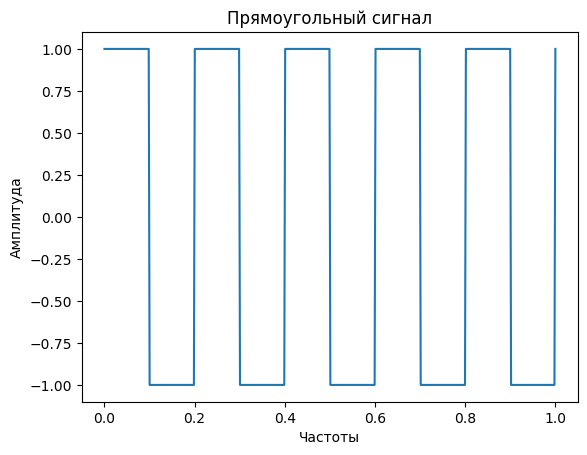

In [16]:
t = np.linspace(0, 1, 500)
square = signal.square(2 * np.pi * 5 * t)
plt.plot(t, square)
plt.title('Прямоугольный сигнал')
plt.xlabel('Частоты')
plt.ylabel('Амплитуда')

(0.0, 200.0)

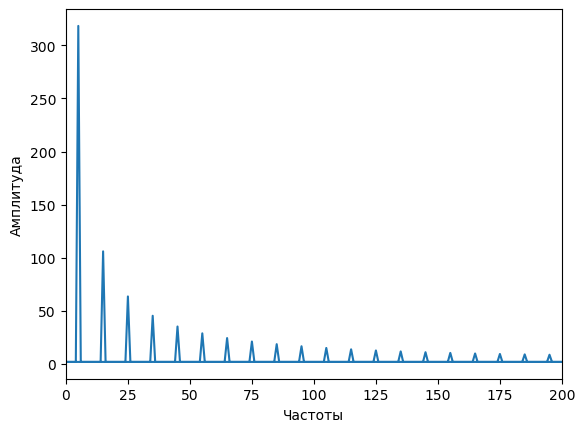

In [18]:
fft_result = fft(square)
amplitude_spectrum = np.abs(fft_result)
plt.plot(frequencies, amplitude_spectrum)
plt.xlabel('Частоты')
plt.ylabel('Амплитуда')
plt.xlim(0,200)

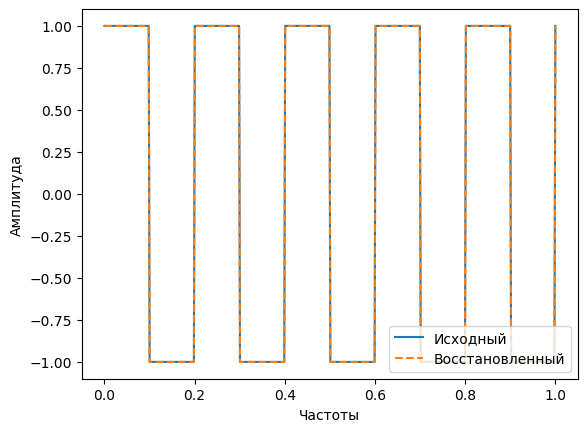

In [20]:
reconstructed = ifft(fft_result).real
plt.plot(t, reconstructed, label='Исходный')
plt.plot(t, square, label='Восстановленный', linestyle='--')
plt.xlabel('Частоты')
plt.ylabel('Амплитуда')
plt.legend(loc="lower right")

(0.0, 100.0)

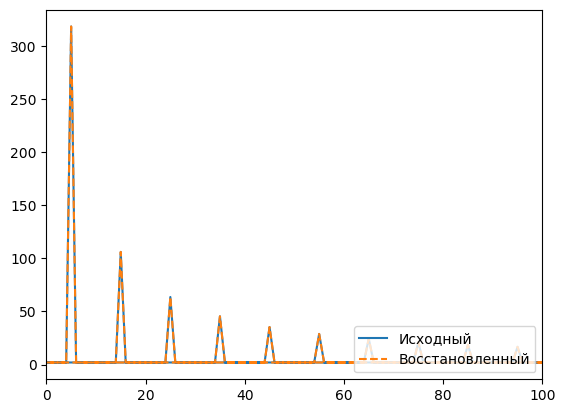

In [21]:
fft_result_reconstructed_square = fft(reconstructed)
amplitude_spectrum_reconstructed_square = np.abs(fft_result_reconstructed_square)
plt.plot(frequencies, amplitude_spectrum, label='Исходный')
plt.plot(frequencies, amplitude_spectrum_reconstructed_square, label='Восстановленный', linestyle='--')
plt.legend(loc="lower right")
plt.xlim(0,100)

In [23]:
write('reconstructed_square_signal.wav', sampling_rate, (reconstructed * 32767).astype(np.int16))